![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [3]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise
- Create a text with `lorem` and count word occurences with a `collection.Counter`. Put the result in a `dict`.

In [5]:
import lorem 
from collections import Counter
import operator

text = lorem.text()
text

'Voluptatem dolorem quiquia porro aliquam. Non est dolorem ut velit ipsum. Neque ut quisquam etincidunt tempora quisquam. Ipsum amet tempora quiquia amet voluptatem modi amet. Modi ipsum neque etincidunt adipisci. Aliquam amet dolor consectetur eius. Eius est labore labore.\n\nEtincidunt quisquam velit sed sit quisquam. Dolor numquam quaerat dolorem. Neque magnam porro amet amet neque quaerat labore. Quiquia eius adipisci est velit porro numquam. Consectetur voluptatem quiquia dolorem magnam. Ipsum est dolore porro etincidunt. Quiquia aliquam dolor dolorem amet est eius. Sed dolorem ut numquam etincidunt sit.\n\nModi aliquam labore etincidunt dolor est adipisci voluptatem. Velit sed sit dolorem numquam tempora modi numquam. Modi dolore adipisci quisquam. Tempora non non non neque labore numquam. Dolore non velit labore aliquam magnam sed. Aliquam ipsum dolore aliquam sit quiquia numquam. Aliquam etincidunt quaerat adipisci voluptatem aliquam amet ut.\n\nSit tempora quaerat quisquam sit

In [6]:
c = Counter(filter(None,text.strip().replace('.','').replace('\n',' ').lower().split(' ')))
result = dict(sorted(c.most_common(),key=operator.itemgetter(1),reverse=True))
result

{'dolorem': 12,
 'amet': 10,
 'numquam': 10,
 'aliquam': 9,
 'est': 9,
 'etincidunt': 8,
 'quiquia': 7,
 'porro': 7,
 'velit': 7,
 'quisquam': 7,
 'labore': 7,
 'voluptatem': 6,
 'non': 6,
 'neque': 6,
 'tempora': 6,
 'modi': 6,
 'dolor': 6,
 'eius': 6,
 'sit': 6,
 'ut': 5,
 'ipsum': 5,
 'adipisci': 5,
 'sed': 5,
 'quaerat': 5,
 'magnam': 5,
 'dolore': 5,
 'consectetur': 4}

### Exercise
- From the results create a Pandas series name latin_series with words in alphabetical order as index.

In [7]:
df = pd.Series(result)
df

dolorem        12
amet           10
numquam        10
aliquam         9
               ..
quaerat         5
magnam          5
dolore          5
consectetur     4
Length: 27, dtype: int64

### Exercise

- Plot the series using 'bar' kind.

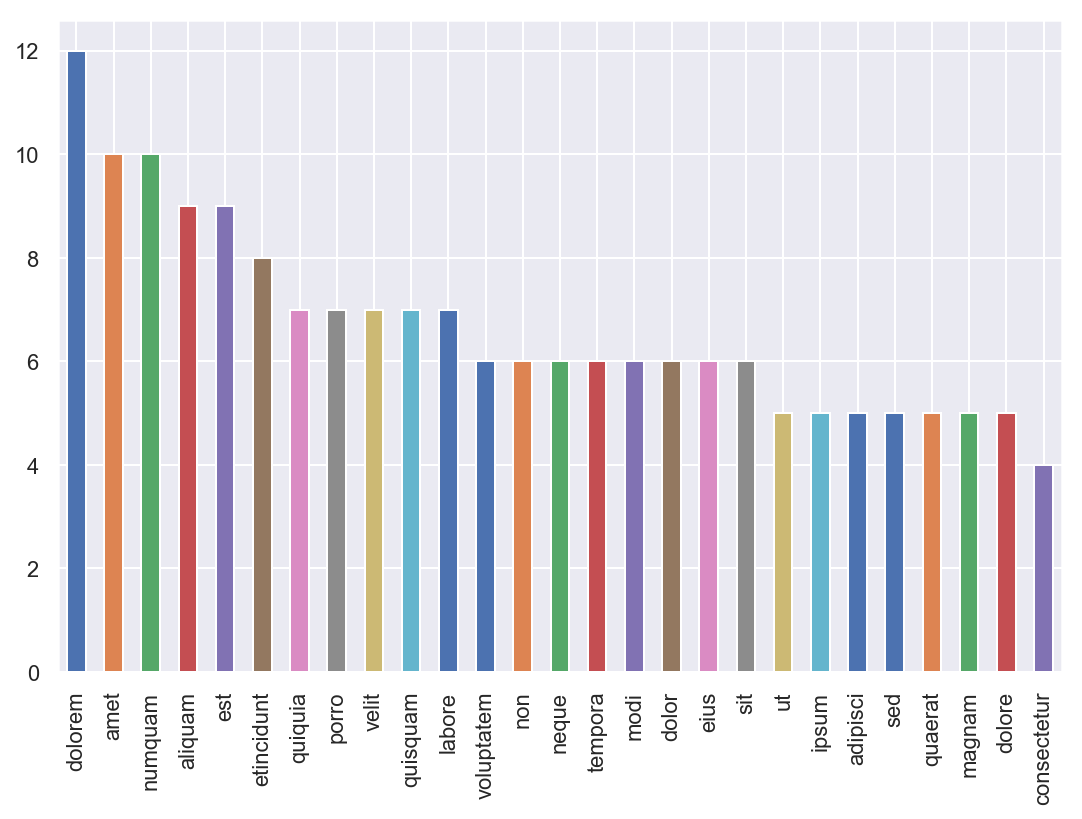

In [8]:
df.plot(kind='bar')

### Exercise
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.

In [9]:
df.loc['dolore'], df['dolore'], df.dolore

(5, 5, 5)

In [10]:
df.iloc[-1], df[-1], df[df.keys()[-1]]

(4, 4, 4)

### Exercise
- Sort words by number of occurrences.
- Plot the Series.

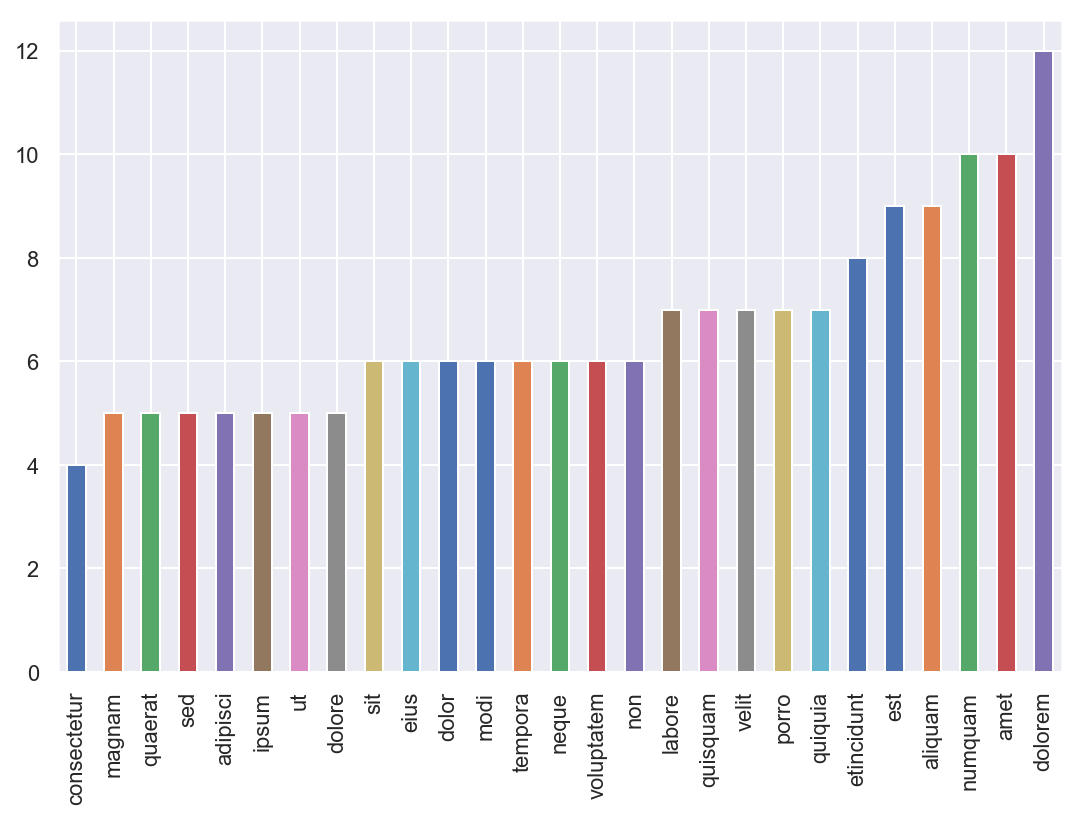

In [11]:
df = df.sort_values()
df.plot(kind='bar')

### Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe. 
In cells below you need to clean the data and convert the dataframe to a time series.

In [12]:
import os
here = os.getcwd()

filename = os.path.join(here,"../data","monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+", 
                   names=["year", "month", "mean temp"])
df

,year,month,mean temp
0,1880,1,-0.0235
1,1880,2,-0.4936
2,1880,3,-0.6785
3,1880,4,-0.2829
...,...,...,...
1580,2011,9,-999.0000
1581,2011,10,-999.0000
1582,2011,11,-999.0000
1583,2011,12,-999.0000


### Exercise
- Insert a third column with value one named "day" with `.insert`.
- convert df index to datetime with `pd.to_datetime` function.
- convert df to Series containing only "mean temp" column.

In [13]:
df.insert(loc=2,column='day',value=np.ones(len(df)))
df

,year,month,day,mean temp
0,1880,1,1.0,-0.0235
1,1880,2,1.0,-0.4936
2,1880,3,1.0,-0.6785
3,1880,4,1.0,-0.2829
...,...,...,...,...
1580,2011,9,1.0,-999.0000
1581,2011,10,1.0,-999.0000
1582,2011,11,1.0,-999.0000
1583,2011,12,1.0,-999.0000


In [14]:
df.index = pd.to_datetime(df[['year','month','day']])
df

,year,month,day,mean temp
1880-01-01,1880,1,1.0,-0.0235
1880-02-01,1880,2,1.0,-0.4936
1880-03-01,1880,3,1.0,-0.6785
1880-04-01,1880,4,1.0,-0.2829
...,...,...,...,...
2011-09-01,2011,9,1.0,-999.0000
2011-10-01,2011,10,1.0,-999.0000
2011-11-01,2011,11,1.0,-999.0000
2011-12-01,2011,12,1.0,-999.0000


In [15]:
df = df['mean temp']
df

1880-01-01     -0.0235
1880-02-01     -0.4936
1880-03-01     -0.6785
1880-04-01     -0.2829
                ...   
2011-09-01   -999.0000
2011-10-01   -999.0000
2011-11-01   -999.0000
2011-12-01   -999.0000
Name: mean temp, Length: 1584, dtype: float64

In [16]:
type(df)

pandas.core.series.Series

### Exercise 
- Display the beginning of the file with `.head`.

In [17]:
df.head()

1880-01-01   -0.0235
1880-02-01   -0.4936
1880-03-01   -0.6785
1880-04-01   -0.2829
1880-05-01   -0.1261
Name: mean temp, dtype: float64

### Exercise 
- Display the end of the file with `.tail`.

In [18]:
df.tail()

2011-08-01   -999.0
2011-09-01   -999.0
2011-10-01   -999.0
2011-11-01   -999.0
2011-12-01   -999.0
Name: mean temp, dtype: float64

In the dataset, -999.00 was used to indicate that there was no value for that year.

### Exercise

- Display values equal to -999 with `.values`. 
- Replace the missing value (-999.000) by `np.nan` 


In [19]:
df[df.values == -999]

2011-07-01   -999.0
2011-08-01   -999.0
2011-09-01   -999.0
2011-10-01   -999.0
2011-11-01   -999.0
2011-12-01   -999.0
Name: mean temp, dtype: float64

In [20]:
df2 = df.copy() 
df2[df == -999.0] = np.nan  # For this indexing we need a copy
df2.tail()

2011-08-01   NaN
2011-09-01   NaN
2011-10-01   NaN
2011-11-01   NaN
2011-12-01   NaN
Name: mean temp, dtype: float64


Once they have been converted to np.nan, missing values can be removed (dropped).

### Exercise 
- Remove missing values with `.dropna`.

In [21]:
df = df2.dropna()
df.tail()

2011-02-01    0.5113
2011-03-01    0.8618
2011-04-01    1.0897
2011-05-01    0.7247
2011-06-01    0.8550
Name: mean temp, dtype: float64

### Exercise
- Generate a basic visualization using `.plot`.

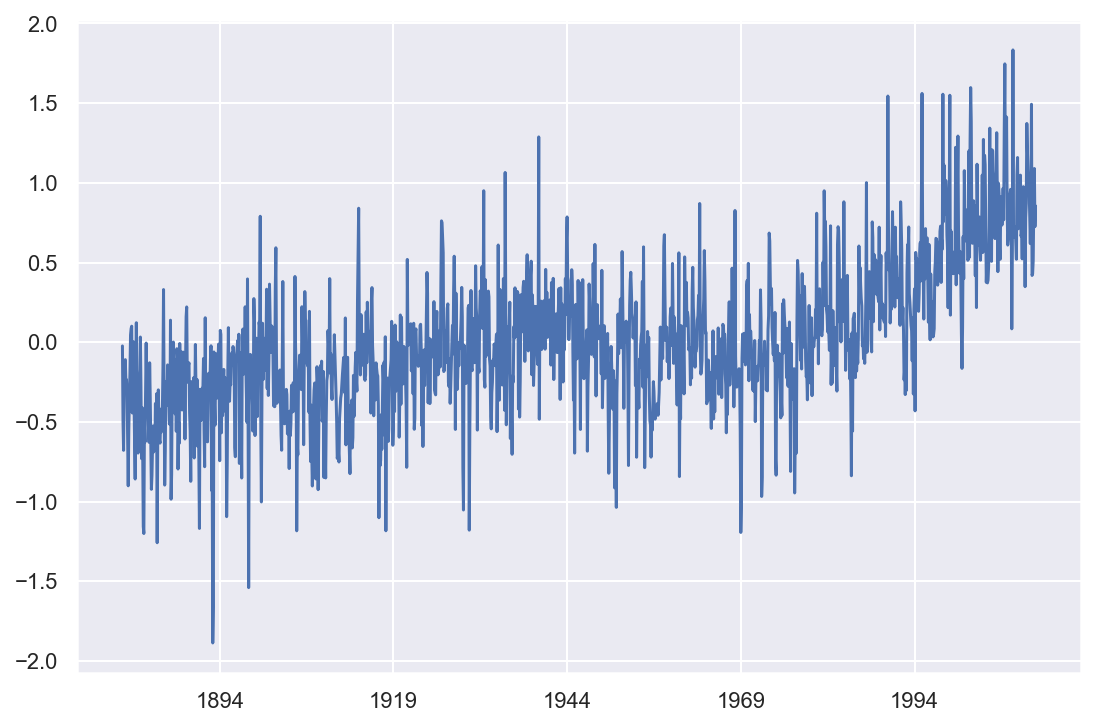

In [22]:
df.plot();

### Exercise

Convert df index from timestamp to period is more meaningfull since it was measured and averaged over the month. Use `to_period` method.


In [23]:
df = df.to_period('M')
df

1880-01   -0.0235
1880-02   -0.4936
1880-03   -0.6785
1880-04   -0.2829
            ...  
2011-03    0.8618
2011-04    1.0897
2011-05    0.7247
2011-06    0.8550
Freq: M, Name: mean temp, Length: 1578, dtype: float64

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Exercise

- With `resample` method, convert df Series to 10 year blocks:

In [24]:
df.resample('10A').mean()


1880   -0.386485
1890   -0.316798
1900   -0.256431
1910   -0.247673
          ...   
1980    0.188519
1990    0.463572
2000    0.785452
2010    0.884700
Freq: 10A-DEC, Name: mean temp, Length: 14, dtype: float64

# Rolling mean

In [25]:
s = df.resample('10A')
s

PeriodIndexResampler [freq=<10 * YearEnds: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [26]:
r = df.rolling(window=200).mean().dropna()
r

1896-08   -0.381177
1896-09   -0.381628
1896-10   -0.378910
1896-11   -0.379321
             ...   
2011-03    0.724232
2011-04    0.728711
2011-05    0.730813
2011-06    0.732261
Freq: M, Name: mean temp, Length: 1379, dtype: float64

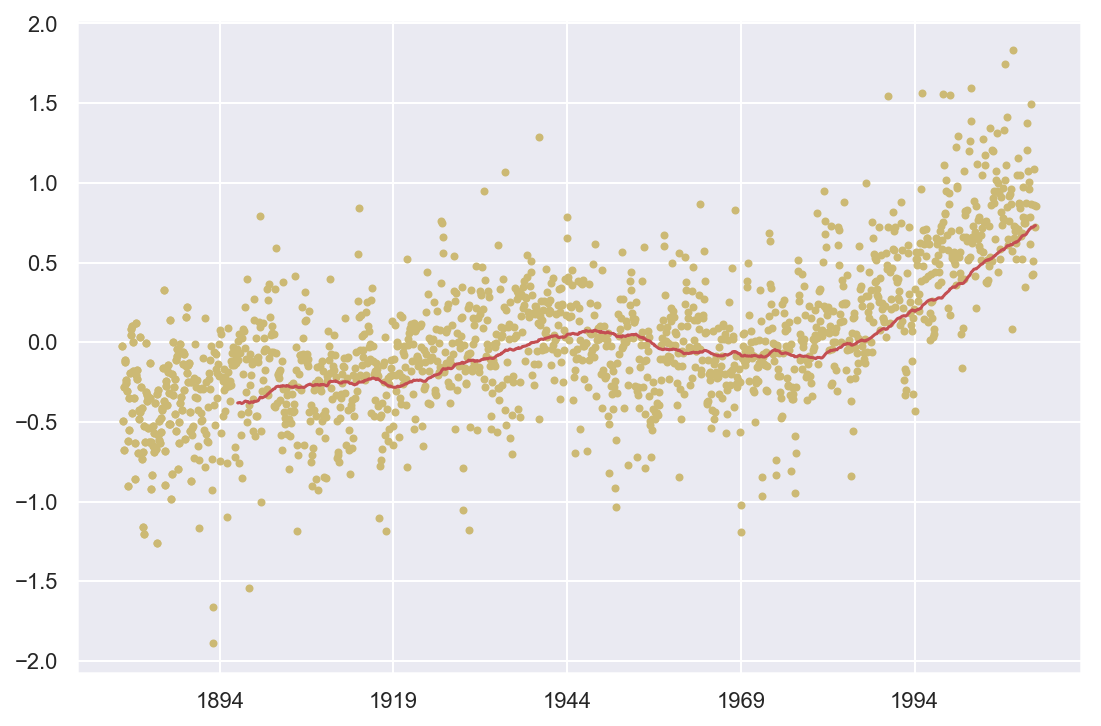

In [27]:
s.plot(style='y.')
r.plot(style='r')

# Saving Work

Excel Writer does not work with Series.

In [28]:
with pd.ExcelWriter("../data/test.xls") as writer:
    pd.DataFrame({"Full Globe Temperature": df}).to_excel(writer, sheet_name="Full Globe Temperature")

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [29]:
with pd.HDFStore("../data/pandas_series.h5") as writer:
    df.to_hdf(writer, "/temperatures/full_globe")

# Reloading data

In [30]:
with pd.HDFStore("../data/pandas_series.h5") as store:
    df = store["/temperatures/full_globe"]